# Feed-Forward-Network

In this exercise, I will implement a Feed-Forward Network with a hidden layer and a sigmoid activation function using only Python and NumPy. It should replicate architecture below.

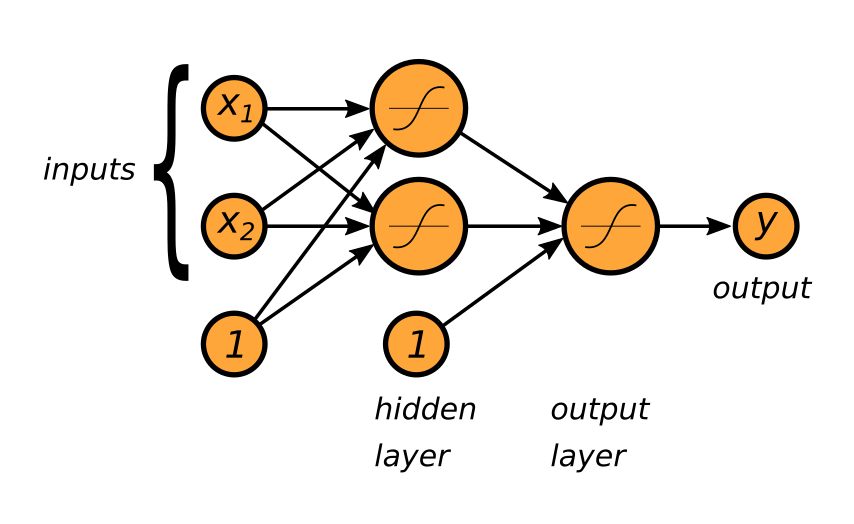

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 15

In [2]:
X, y = make_moons(n_samples = 50, noise = 0.2, random_state = 42)

In [3]:
X

array([[-0.15856989,  0.98480618],
       [ 1.10900374, -0.62160223],
       [ 0.39641523,  0.20740869],
       [ 1.79239122,  0.07511293],
       [-0.84739307,  0.71154296],
       [ 1.90209657,  0.67432213],
       [ 0.0731551 ,  0.09079042],
       [-0.43566685,  0.29122072],
       [ 0.42577731, -0.22851359],
       [-0.64418143,  0.24144478],
       [ 0.11289285,  1.00510013],
       [ 0.96066405,  0.63183812],
       [ 1.46814927, -0.28580296],
       [ 0.5192833 ,  0.94984582],
       [ 0.73327397,  0.17310931],
       [ 0.33197143,  0.43375035],
       [ 1.62726102, -0.54736954],
       [ 2.01908805,  0.37804882],
       [ 2.00824323,  0.36058988],
       [-0.56195047,  0.90148197],
       [ 0.67647169,  0.69909987],
       [-0.30999892,  1.2113287 ],
       [-0.90842298, -0.33685748],
       [ 0.68268561, -0.44010332],
       [ 0.38645217, -0.05988231],
       [ 0.84405962, -0.16877927],
       [ 1.76324657, -0.30187296],
       [ 0.06417199,  0.2184967 ],
       [ 1.02670564,

In [4]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

Text(0, 0.5, 'X[1]')

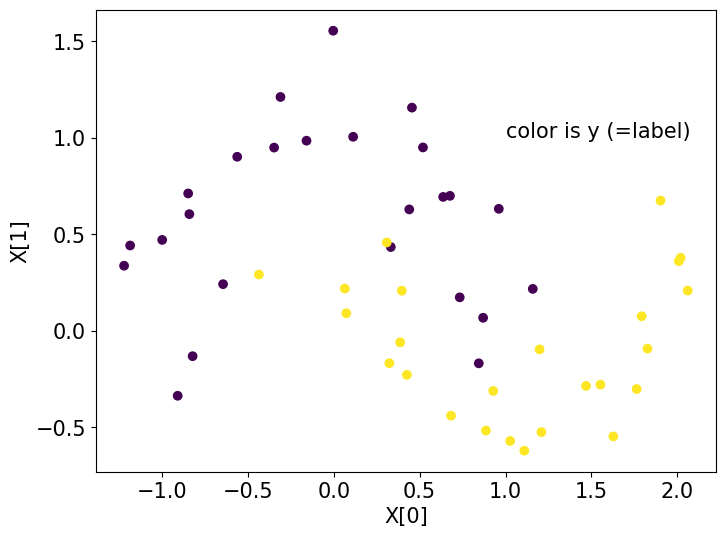

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)

plt.text(1,1,'color is y (=label)')
plt.xlabel('X[0]')
plt.ylabel('X[1]')

In [6]:
#X = np.hstack([X, np.ones((X.shape[0], 1))])

In [7]:
def add_ones(X):
    """ Returns the input-NumPy array X with an additional column of ones
    Parameter
    *********
    X: numpy array 
    """
    # Create an array of 1 with same number of rows as X
    ones = np.ones(shape=(X.shape[0], 1))
    
    # Add ones to X
    X_incl_ones = np.hstack((X, ones))
    return X_incl_ones

In [8]:
# add bias
X_incl_ones = add_ones(X)

In [9]:
X_incl_ones.shape

(50, 3)

In [10]:
X_incl_ones[0:5]

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ]])

In [11]:
# Write a sigmoid function

def sigmoid(x):
    """Returns a NumPy array,
       where all of the original values x
       have been transformed by the sigmoid function
    Parameters:
    **********
    x: NumPy array
       """
    f_of_x = 1 / (1 + np.exp(-x))
    return f_of_x


In [13]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [14]:
# Initialize the network with random input weights 
w_in = np.random.rand(3,2)    # ---> rand return random within [0, 1)

In [15]:
w_in

array([[0.15004734, 0.13873138],
       [0.61078866, 0.6534522 ],
       [0.87200309, 0.5525271 ]])

In [16]:
# random output weigths
w_out = np.random.rand(3,1)

In [17]:
w_out

array([[0.56467105],
       [0.88209515],
       [0.77979084]])

Text(0.5, 1.0, 'Sigmoid function')

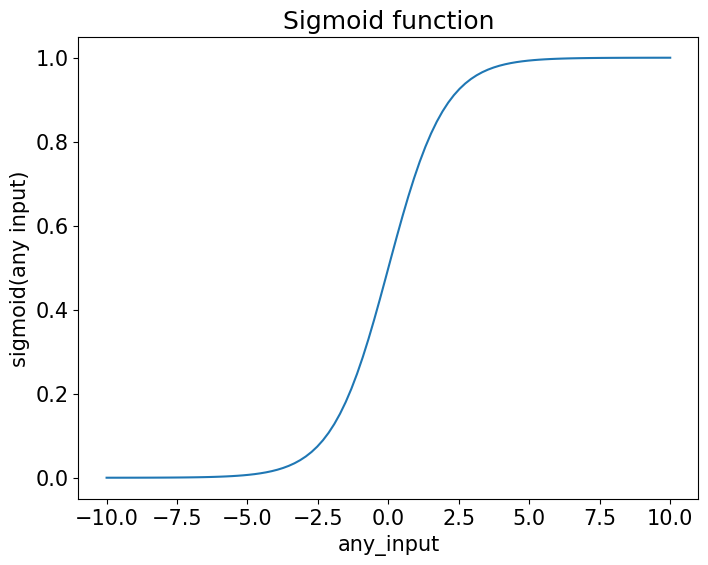

In [18]:
# check the sigmoid function
any_input = np.linspace(-10,10,100)

plt.plot(any_input, sigmoid(any_input))
plt.xlabel('any_input')
plt.ylabel('sigmoid(any input)');
plt.title('Sigmoid function')

In [19]:
step1 = np.dot(X_incl_ones, w_in) # --> shape = (50,3)*(3,2) which shape do we get?

In [20]:
step1.shape

(50, 2)

In [21]:
step1

array([[1.44971855, 1.17405224],
       [0.65873856, 0.30019337],
       [1.05816702, 0.74305399],
       [1.18682475, 0.85027071],
       [1.17945639, 0.8999264 ],
       [1.56927593, 1.25704486],
       [0.93843358, 0.6220032 ],
       [0.98450675, 0.68238525],
       [0.79631634, 0.46227306],
       [0.92281712, 0.62093154],
       [1.50284613, 1.22497377],
       [1.40206773, 1.09867735],
       [0.91772977, 0.56944689],
       [1.53007523, 1.24524683],
       [1.0877621 , 0.76737387],
       [1.18674432, 0.88201707],
       [0.78184217, 0.42059943],
       [1.40586981, 1.0796748 ],
       [1.39357885, 1.0667617 ],
       [1.33829888, 1.06364231],
       [1.40050814, 1.10320329],
       [1.56535441, 1.30106592],
       [0.52994791, 0.20638007],
       [0.70562813, 0.35965053],
       [0.89341377, 0.56700991],
       [0.89556353, 0.55933546],
       [0.95219296, 0.59988517],
       [1.01508724, 0.70420692],
       [0.6772706 , 0.3218137 ],
       [1.39118731, 1.09409299],
       [1.

In [22]:
# Apply sigmoid function on step1
# output from the neurons of the hidden layer
out1 = sigmoid(step1)

In [23]:
out1.shape

(50, 2)

In [24]:
out1[0:5]

array([[0.80995511, 0.7638767 ],
       [0.65897697, 0.57448979],
       [0.7423401 , 0.67766332],
       [0.76617269, 0.70062393],
       [0.76485005, 0.71093438]])

In [25]:
step3 = add_ones(out1)

In [26]:
step3.shape

(50, 3)

In [28]:
step4 = np.dot(step3, w_out)

In [29]:
step4.shape

(50, 1)

In [30]:
out2 = sigmoid(step4)

In [31]:
out2.shape

(50, 1)

In [32]:
out2[0:5]

array([[0.87112707],
       [0.84005679],
       [0.8577507 ],
       [0.86181453],
       [0.86280569]])

Text(0.5, 1.0, 'yet badly predicted classes with FFN')

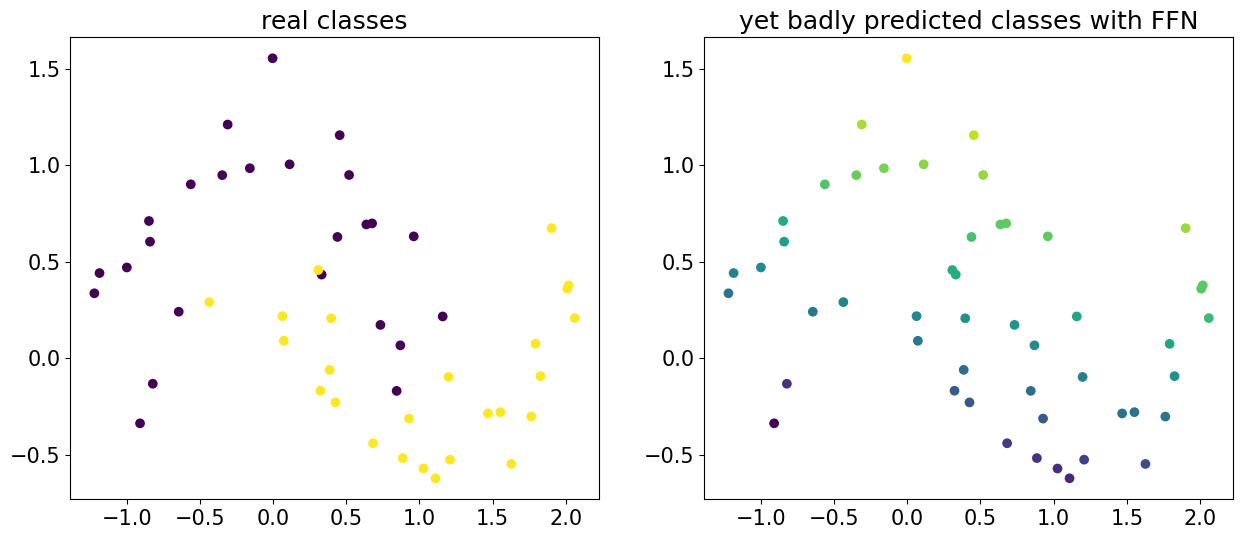

In [33]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)  # row 1, col 2, index 1
ax2 = f.add_subplot(122)
x = np.linspace(0,4,1000)
ax1.scatter(X[:,0], X[:,1], c = y)
ax1.set_title('real classes')

ax2.scatter(X[:,0], X[:,1], c = out2)
ax2.set_title('yet badly predicted classes with FFN')
